# Pixel Intensity Distributions & Colocalization Results

Processing wt_czi_images/WT_H9_NU/Image 48.czi for sample WT_H9_NU...
Processing wt_czi_images/WT_H9_NU/Image 49.czi for sample WT_H9_NU...
Processing wt_czi_images/WT_H9_NU/Image 63.czi for sample WT_H9_NU...
Processing wt_czi_images/WT_H9_NU/Image 66.czi for sample WT_H9_NU...
Processing wt_czi_images/WT_H9_NU/Image 67.czi for sample WT_H9_NU...
Processing wt_czi_images/WT_H9_NU/Image 65.czi for sample WT_H9_NU...
Processing wt_czi_images/WT_H9_NU/Image 59.czi for sample WT_H9_NU...
Processing wt_czi_images/WT_H9_NU/Image 58.czi for sample WT_H9_NU...
Processing wt_czi_images/WT_H9_NU/Image 64.czi for sample WT_H9_NU...
Processing wt_czi_images/WT_H9_NU/Image 17.czi for sample WT_H9_NU...
Processing wt_czi_images/WT_H9_NU/Image 28.czi for sample WT_H9_NU...
Processing wt_czi_images/WT_H9_NU/Image 14.czi for sample WT_H9_NU...
Processing wt_czi_images/WT_H9_NU/Image 29.czi for sample WT_H9_NU...
Processing wt_czi_images/WT_H9_NU/Image 39.czi for sample WT_H9_NU...
Processing wt_czi_im

Processing wt_czi_images/WT_H9_Ctrl/Image 65.czi for sample WT_H9_Ctrl...
Processing wt_czi_images/WT_H9_Ctrl/Image 59.czi for sample WT_H9_Ctrl...
Processing wt_czi_images/WT_H9_Ctrl/Image 64.czi for sample WT_H9_Ctrl...
Processing wt_czi_images/WT_H9_Ctrl/Image 70.czi for sample WT_H9_Ctrl...
Processing wt_czi_images/WT_H9_Ctrl/Image 17.czi for sample WT_H9_Ctrl...
Processing wt_czi_images/WT_H9_Ctrl/Image 16.czi for sample WT_H9_Ctrl...
Processing wt_czi_images/WT_H9_Ctrl/Image 28.czi for sample WT_H9_Ctrl...
Processing wt_czi_images/WT_H9_Ctrl/Image 14.czi for sample WT_H9_Ctrl...
Processing wt_czi_images/WT_H9_Ctrl/Image 15.czi for sample WT_H9_Ctrl...
Processing wt_czi_images/WT_H9_Ctrl/Image 39.czi for sample WT_H9_Ctrl...
Processing wt_czi_images/WT_H9_Ctrl/Image 8.czi for sample WT_H9_Ctrl...
Processing wt_czi_images/WT_H9_Ctrl/Image 9.czi for sample WT_H9_Ctrl...
Processing wt_czi_images/WT_H9_Ctrl/Image 38.czi for sample WT_H9_Ctrl...
Processing wt_czi_images/WT_H9_Ctrl/Imag

Processing wt_czi_images/WT_H9_MLN/Image 11.czi for sample WT_H9_MLN...
Processing wt_czi_images/WT_H9_MLN/Image 8.czi for sample WT_H9_MLN...
Processing wt_czi_images/WT_H9_MLN/Image 9.czi for sample WT_H9_MLN...
Processing wt_czi_images/WT_H9_MLN/Image 38.czi for sample WT_H9_MLN...
Processing wt_czi_images/WT_H9_MLN/Image 10.czi for sample WT_H9_MLN...
Processing wt_czi_images/WT_H9_MLN/Image 12.czi for sample WT_H9_MLN...
Processing wt_czi_images/WT_H9_MLN/Image 36.czi for sample WT_H9_MLN...
Processing wt_czi_images/WT_H9_MLN/Image 22.czi for sample WT_H9_MLN...
Processing wt_czi_images/WT_H9_MLN/Image 7.czi for sample WT_H9_MLN...
Processing wt_czi_images/WT_H9_MLN/Image 6.czi for sample WT_H9_MLN...
Processing wt_czi_images/WT_H9_MLN/Image 23.czi for sample WT_H9_MLN...
Processing wt_czi_images/WT_H9_MLN/Image 37.czi for sample WT_H9_MLN...
Processing wt_czi_images/WT_H9_MLN/Image 21.czi for sample WT_H9_MLN...
Processing wt_czi_images/WT_H9_MLN/Image 4.czi for sample WT_H9_MLN.

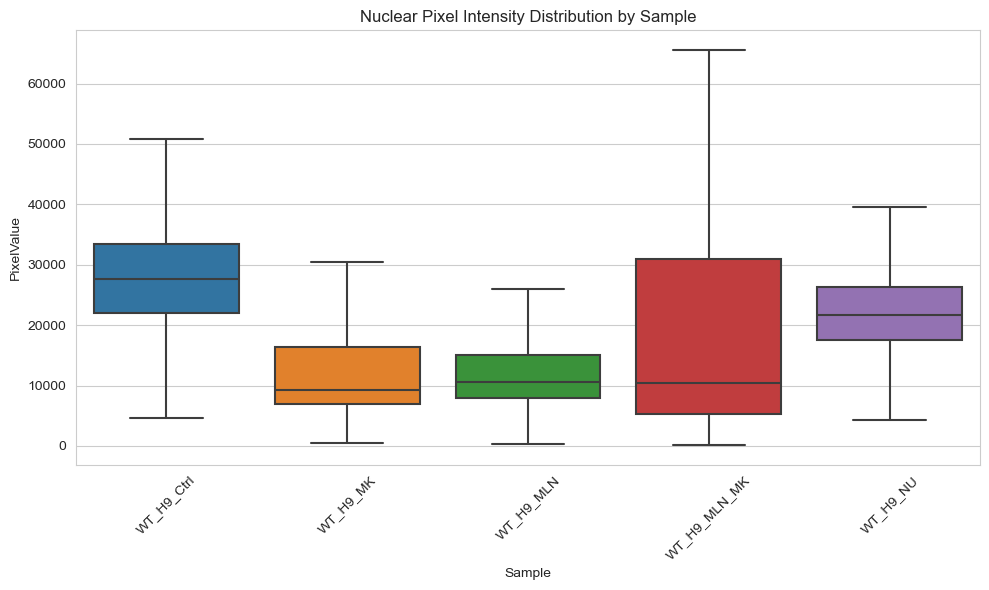

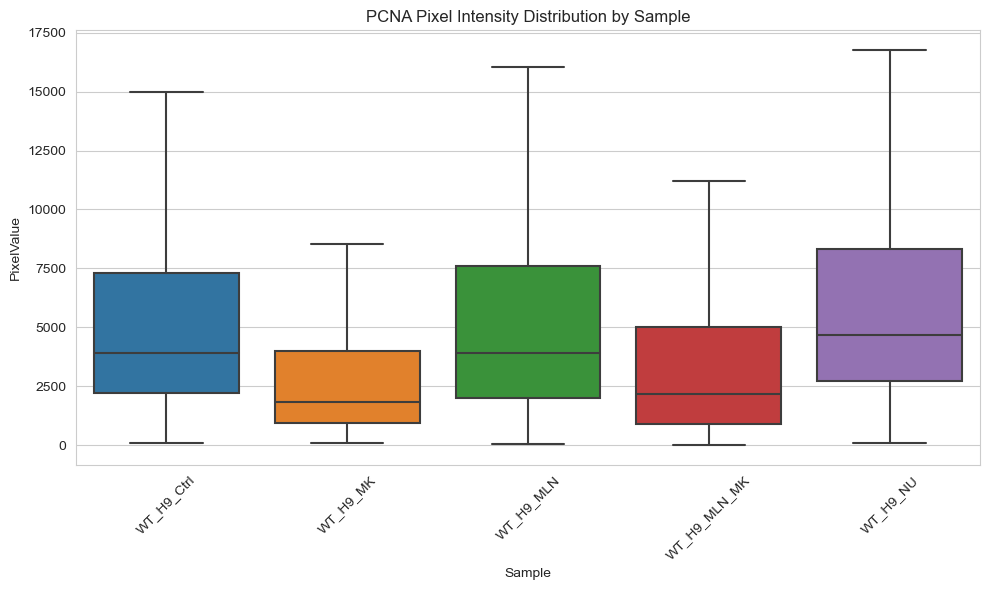

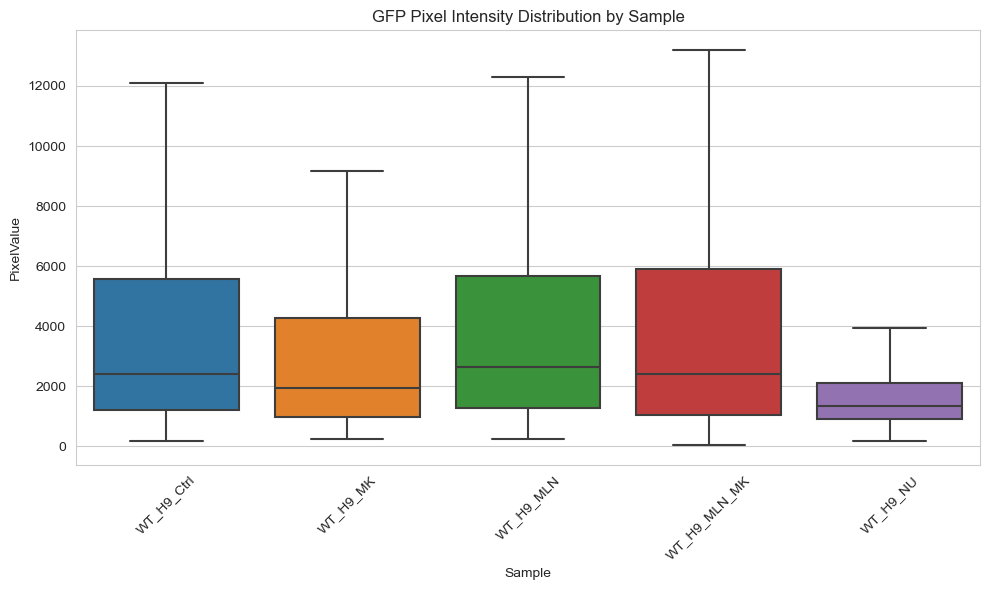

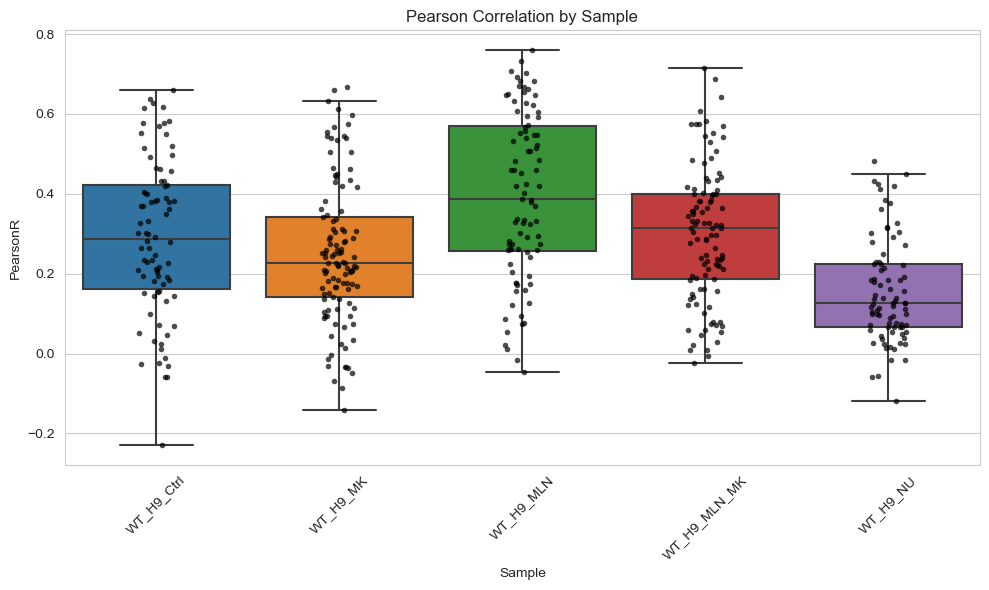

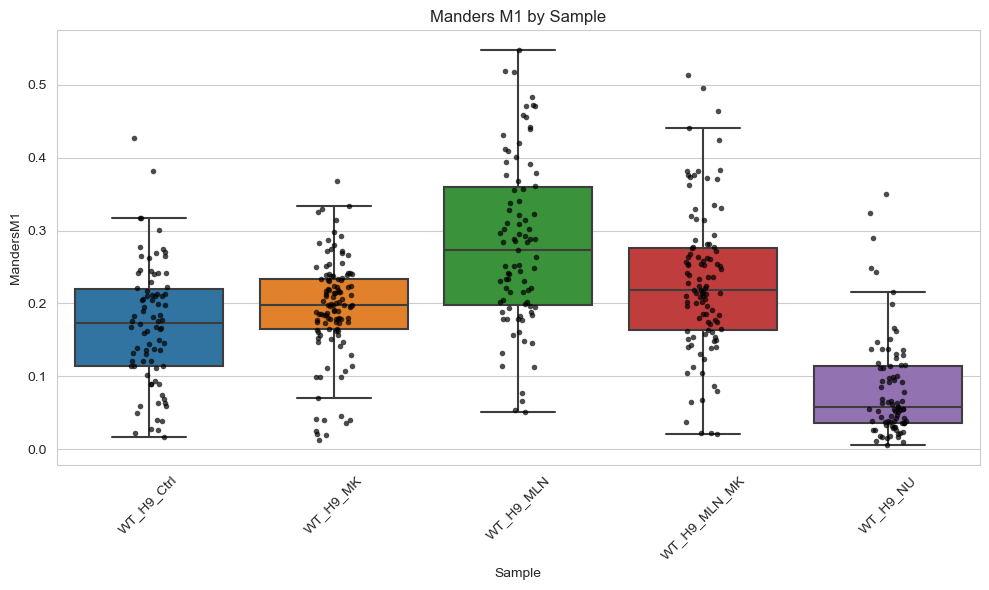

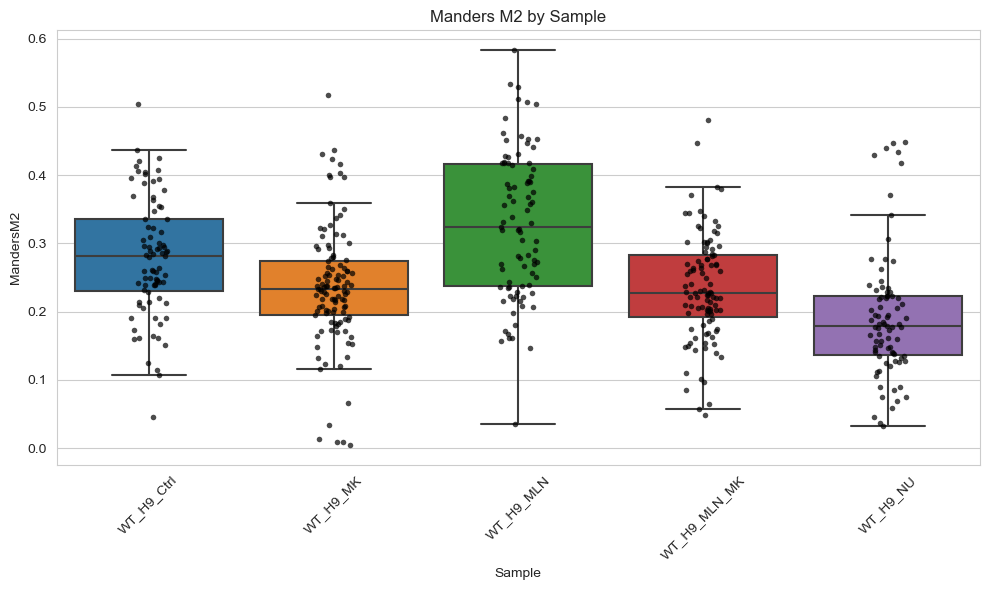

In [1]:
import os
import numpy as np
import pandas as pd
from skimage import filters, measure, morphology
from skimage.filters import gaussian, threshold_otsu
from aicsimageio import AICSImage
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# -----------------------------------------------------------------------------
# Parameters
# -----------------------------------------------------------------------------
data_dir = 'wt_czi_images'  # root directory containing sample folders
output_dir = 'results_wt'
blur_sigma = 1.0
min_object_size = 200
hole_fill_size = 200

# Channel order: 0 = segment channel, 1 = PCNA, 2 = GFP
nuclear_channel = 0
pcna_channel = 1
gfp_channel = 2

os.makedirs(output_dir, exist_ok=True)

# Define the explicit order for the samples
sample_order = [
    "WT_H9_Ctrl",
    "WT_H9_MK",
    "WT_H9_MLN",
    "WT_H9_MLN_MK",
    "WT_H9_NU"
]

# -----------------------------------------------------------------------------
# Function to compute colocalization metrics
# -----------------------------------------------------------------------------
def compute_colocalization_metrics(ch1_pixels, ch2_pixels):
    if ch1_pixels.size == 0 or ch2_pixels.size == 0:
        return np.nan, np.nan, np.nan

    # Pearson correlation
    if np.all(ch1_pixels == 0) or np.all(ch2_pixels == 0):
        pearson_r = np.nan
    else:
        pearson_r, _ = pearsonr(ch1_pixels, ch2_pixels)
    
    # Manders Coefficients
    if np.any(ch1_pixels):
        ch1_thresh = threshold_otsu(ch1_pixels)
    else:
        ch1_thresh = 0
    
    if np.any(ch2_pixels):
        ch2_thresh = threshold_otsu(ch2_pixels)
    else:
        ch2_thresh = 0
    
    ch1_mask = ch1_pixels > ch1_thresh
    ch2_mask = ch2_pixels > ch2_thresh
    
    sum_ch1 = np.sum(ch1_pixels)
    sum_ch2 = np.sum(ch2_pixels)
    
    M1 = np.sum(ch1_pixels[ch2_mask]) / sum_ch1 if sum_ch1 > 0 else np.nan
    M2 = np.sum(ch2_pixels[ch1_mask]) / sum_ch2 if sum_ch2 > 0 else np.nan
    
    return pearson_r, M1, M2

# -----------------------------------------------------------------------------
# Function to process a single CZI image
# -----------------------------------------------------------------------------
def process_image(image_path, sample_name, pixel_data):
    # Load image using AICSImage
    img = AICSImage(image_path)
    # Extract data as C, Y, X (assuming single Z-slice and single T)
    data = img.get_image_data("CYX", S=0, T=0, Z=0) 
    # data shape: (C, Y, X)
    # Move channel axis to last: (Y, X, C)
    stack = np.moveaxis(data, 0, -1)

    if stack.ndim != 3 or stack.shape[-1] < 3:
        raise ValueError(f"Image {image_path} must be (H, W, 3) with three channels.")

    nuc_image = stack[:, :, nuclear_channel].astype(float)
    pcna_image = stack[:, :, pcna_channel].astype(float)
    gfp_image = stack[:, :, gfp_channel].astype(float)
    
    # Segment nuclei
    nuc_blurred = gaussian(nuc_image, sigma=blur_sigma)
    nuc_thresh_val = threshold_otsu(nuc_blurred)
    nuc_binary = nuc_blurred > nuc_thresh_val

    nuc_mask = morphology.remove_small_objects(nuc_binary, min_size=min_object_size)
    nuc_mask = morphology.remove_small_holes(nuc_mask, area_threshold=hole_fill_size)

    labeled_nuclei = measure.label(nuc_mask)
    regions = measure.regionprops(labeled_nuclei)
    
    results = []
    for i, region in enumerate(regions, start=1):
        minr, minc, maxr, maxc = region.bbox
        nucleus_mask = (labeled_nuclei[minr:maxr, minc:maxc] == region.label)

        pcna_pixels = pcna_image[minr:maxr, minc:maxc][nucleus_mask]
        gfp_pixels = gfp_image[minr:maxr, minc:maxc][nucleus_mask]
        nuc_pixels = nuc_image[minr:maxr, minc:maxc][nucleus_mask]

        pearson_r, M1, M2 = compute_colocalization_metrics(pcna_pixels, gfp_pixels)

        results.append({
            'Nucleus_ID': i,
            'PearsonR': pearson_r,
            'MandersM1': M1,
            'MandersM2': M2
        })
        
        # Collect pixel data for boxplots
        pixel_data.append(pd.DataFrame({
            'Sample': sample_name,
            'Channel': 'Nuclear',
            'PixelValue': nuc_pixels
        }))
        pixel_data.append(pd.DataFrame({
            'Sample': sample_name,
            'Channel': 'PCNA',
            'PixelValue': pcna_pixels
        }))
        pixel_data.append(pd.DataFrame({
            'Sample': sample_name,
            'Channel': 'GFP',
            'PixelValue': gfp_pixels
        }))

    return pd.DataFrame(results)

# -----------------------------------------------------------------------------
# Process all samples and images
# -----------------------------------------------------------------------------
all_results = []
pixel_data = []

# Iterate over each folder in data_dir
for sample_folder in os.listdir(data_dir):
    sample_path = os.path.join(data_dir, sample_folder)
    if not os.path.isdir(sample_path):
        continue  # skip non-directory files if any

    sample_name = sample_folder  # Use folder name as sample identifier
    
    # Process each CZI in the sample directory
    for fname in os.listdir(sample_path):
        if fname.lower().endswith('.czi'):
            image_path = os.path.join(sample_path, fname)
            print(f"Processing {image_path} for sample {sample_name}...")
            df = process_image(image_path, sample_name, pixel_data)
            
            # Add columns for sample and image name
            df['Sample'] = sample_name
            df['Image'] = fname
            
            all_results.append(df)

if all_results:
    combined_df = pd.concat(all_results, ignore_index=True)
    combined_df_path = os.path.join(output_dir, 'combined_coloc_results.csv')
    combined_df.to_csv(combined_df_path, index=False)
    print(f"Saved combined results to {combined_df_path}")

    # Combine pixel data into a single DataFrame
    pixel_df = pd.concat(pixel_data, ignore_index=True)
    
    # Ensure the sample order is respected
    pixel_df['Sample'] = pd.Categorical(pixel_df['Sample'], categories=sample_order, ordered=True)

    sns.set_style("whitegrid")

    # Plot boxplots for each channel's pixel values (no stripplot)
    channels = ['Nuclear', 'PCNA', 'GFP']
    for ch in channels:
        plt.figure(figsize=(10,6))
        sns.boxplot(
            data=pixel_df[pixel_df['Channel'] == ch],
            x='Sample', y='PixelValue', order=sample_order, showfliers=False
        )
        plt.title(f"{ch} Pixel Intensity Distribution by Sample")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f'{ch.lower()}_pixel_boxplot.png'))
        plt.show()

    # The original colocalization metrics boxplots remain unchanged:
    # Pearson
    plt.figure(figsize=(10,6))
    sns.boxplot(data=combined_df, x='Sample', y='PearsonR', order=sample_order, showfliers=False)
    sns.stripplot(data=combined_df, x='Sample', y='PearsonR', order=sample_order, 
                  color='black', size=4, alpha=0.7, jitter=True)
    plt.title("Pearson Correlation by Sample")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'pearson_boxplot.png'))
    plt.show()

    # MandersM1
    plt.figure(figsize=(10,6))
    sns.boxplot(data=combined_df, x='Sample', y='MandersM1', order=sample_order, showfliers=False)
    sns.stripplot(data=combined_df, x='Sample', y='MandersM1', order=sample_order, 
                  color='black', size=4, alpha=0.7, jitter=True)
    plt.title("Manders M1 by Sample")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'mandersM1_boxplot.png'))
    plt.show()

    # MandersM2
    plt.figure(figsize=(10,6))
    sns.boxplot(data=combined_df, x='Sample', y='MandersM2', order=sample_order, showfliers=False)
    sns.stripplot(data=combined_df, x='Sample', y='MandersM2', order=sample_order, 
                  color='black', size=4, alpha=0.7, jitter=True)
    plt.title("Manders M2 by Sample")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'mandersM2_boxplot.png'))
    plt.show()

else:
    print("No images found or no results produced.")


# Normality Assumptions

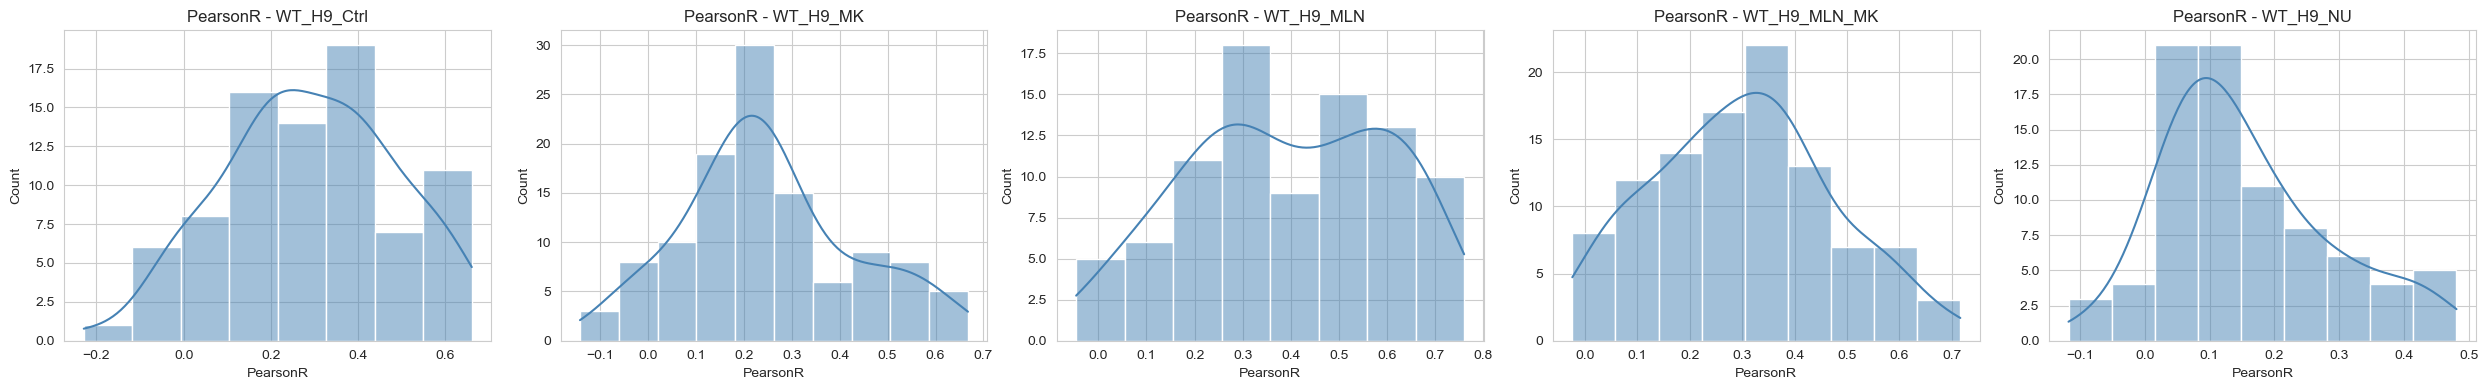

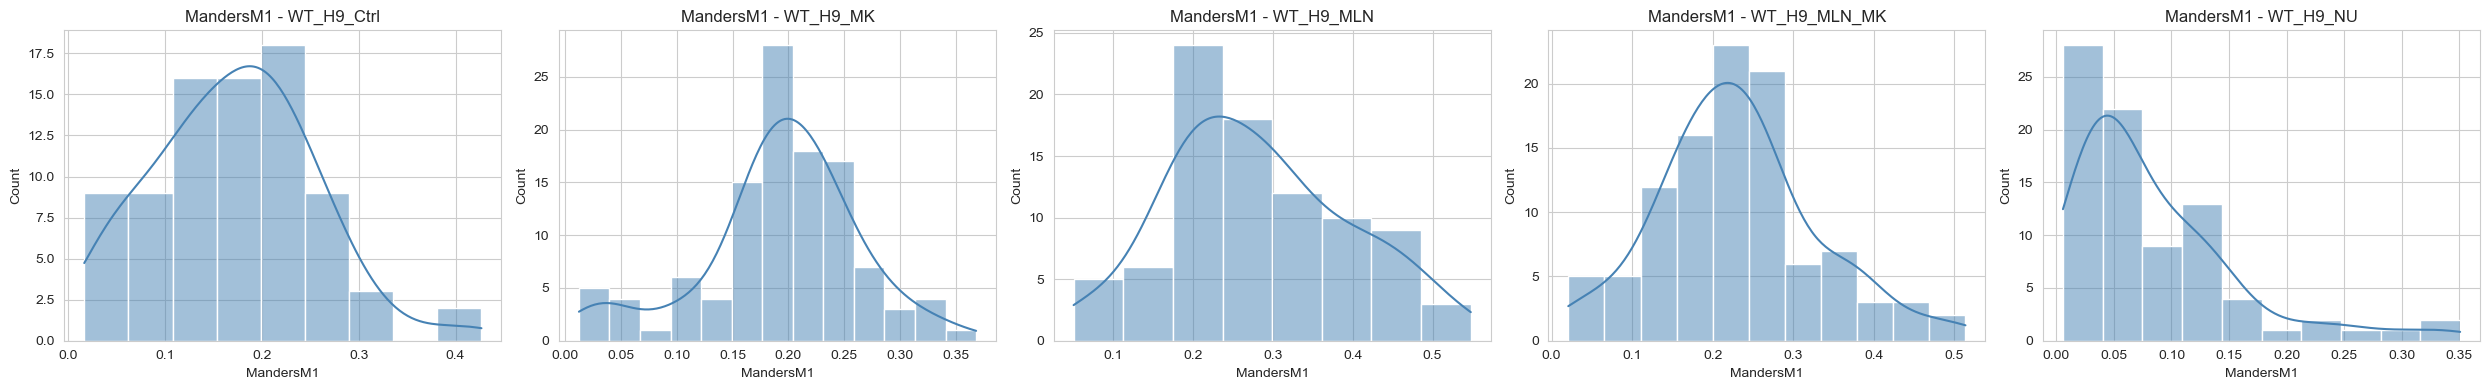

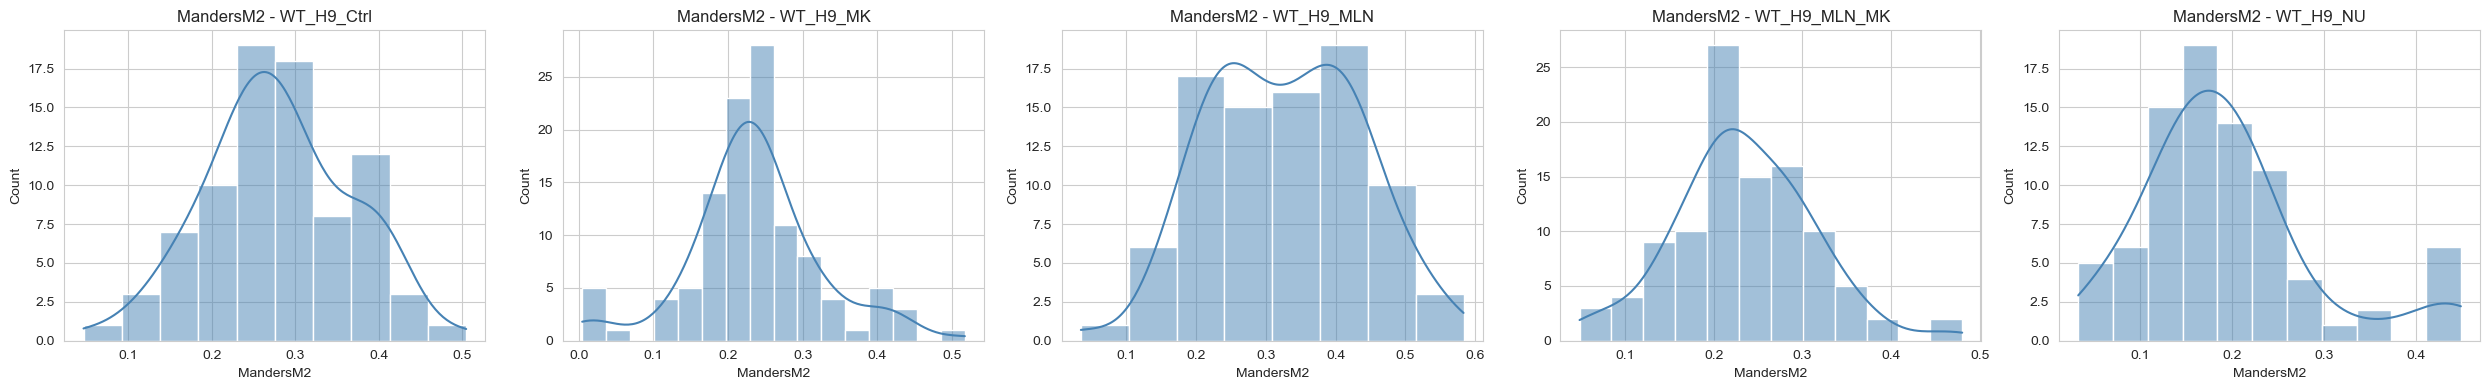

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['PearsonR', 'MandersM1', 'MandersM2']

# Create histograms for each metric and each sample
for m in metrics:
    fig, axes = plt.subplots(1, len(sample_order), figsize=(5*len(sample_order), 4))
    for ax, s in zip(axes, sample_order):
        data_sample = combined_df.loc[combined_df['Sample'] == s, m].dropna()
        sns.histplot(data_sample, kde=True, ax=ax, color='steelblue')
        ax.set_title(f"{m} - {s}")
        ax.set_xlabel(m)
        ax.set_ylabel("Count")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'{m.lower()}_histograms.png'))
    plt.show()


# Statistical Analysis


=== ANOVA for PearsonR ===
Shapiro-Wilk test for normality (residuals): W=0.991, p=0.005
Levene's test for equal variances: stat=6.917, p=0.000

ANOVA Results:
              sum_sq     df          F        PR(>F)
C(Sample)   2.586949    4.0  20.289435  2.052400e-15
Residual   14.758390  463.0        NaN           NaN

Post-hoc Tukey HSD:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
  WT_H9_Ctrl     WT_H9_MK  -0.0393 0.5529 -0.1102  0.0317  False
  WT_H9_Ctrl    WT_H9_MLN   0.1045 0.0015  0.0292  0.1798   True
  WT_H9_Ctrl WT_H9_MLN_MK   0.0105 0.9947 -0.0618  0.0829  False
  WT_H9_Ctrl     WT_H9_NU  -0.1351    0.0 -0.2113  -0.059   True
    WT_H9_MK    WT_H9_MLN   0.1438    0.0   0.074  0.2135   True
    WT_H9_MK WT_H9_MLN_MK   0.0498 0.2457 -0.0168  0.1164  False
    WT_H9_MK     WT_H9_NU  -0.0959 0.0021 -0.1666 -0.0252   True
   WT_H9_

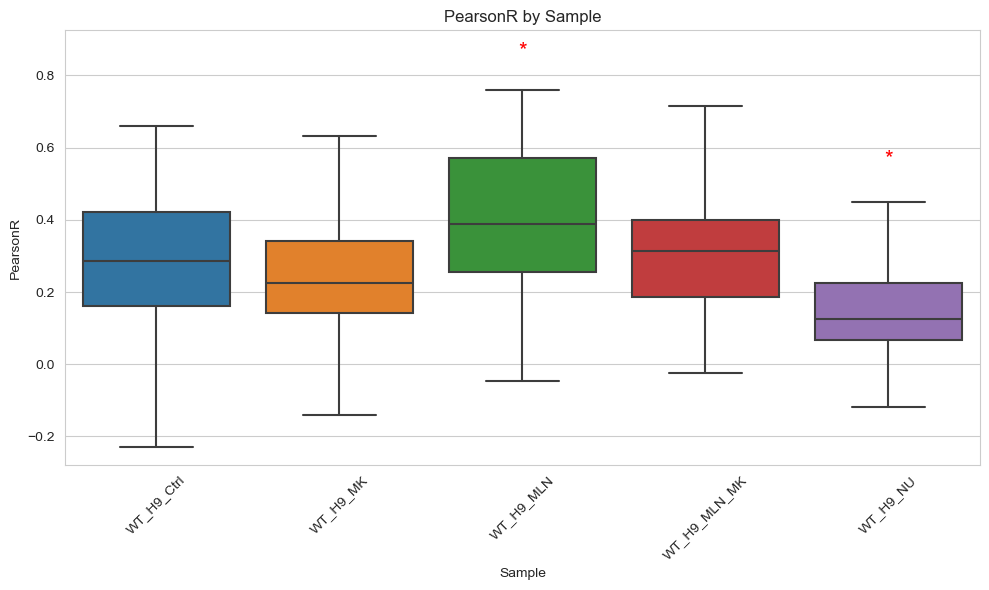

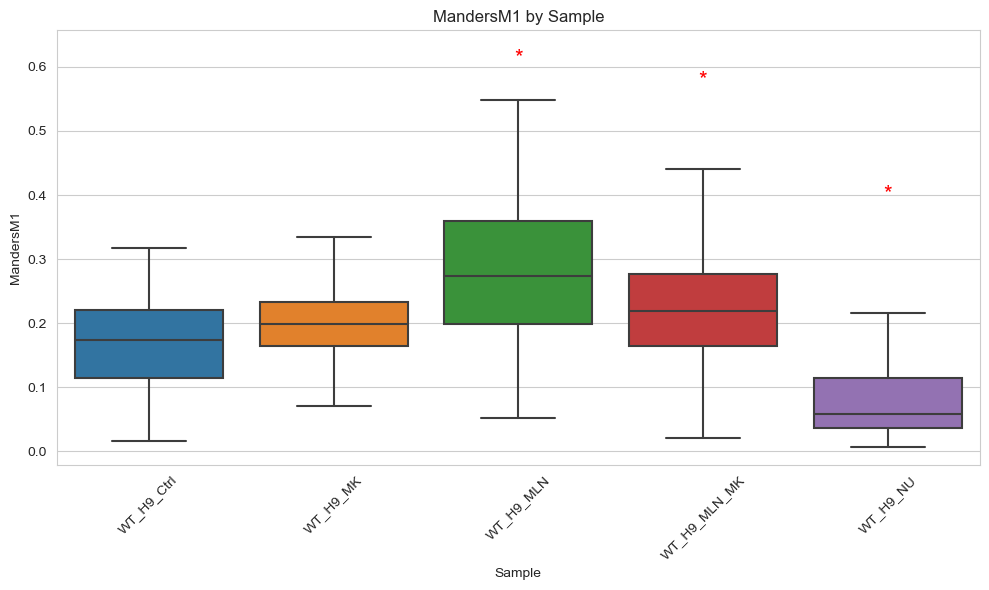

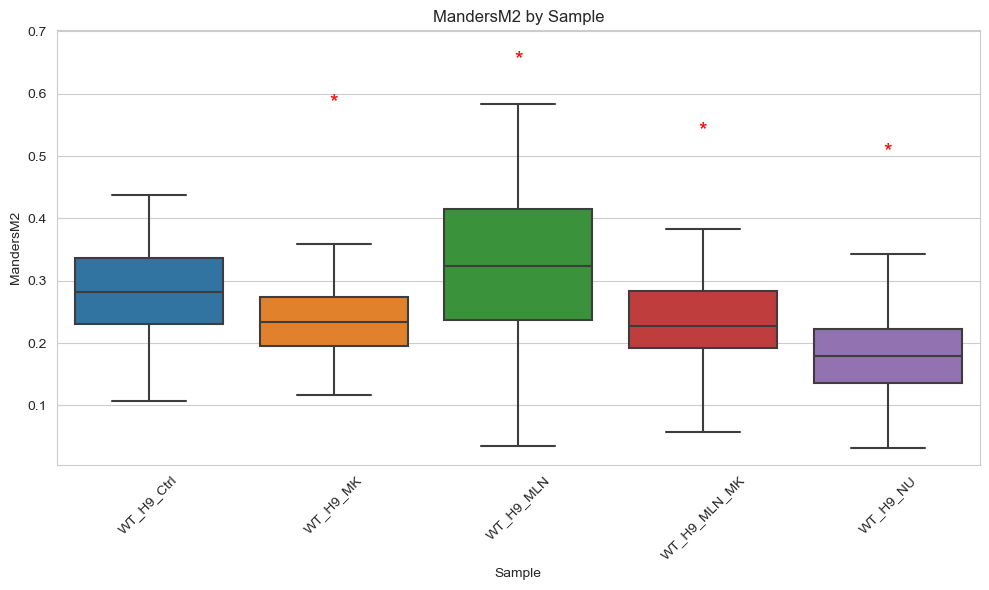

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Adjust the sample order to exclude "WT_Ctrl_G1" and make "WT_H9_Ctrl" the first
sample_order = [
    "WT_H9_Ctrl",
    "WT_H9_MK",
    "WT_H9_MLN",
    "WT_H9_MLN_MK",
    "WT_H9_NU"
]

# Assuming combined_df is already loaded and available
# Filter out WT_Ctrl_G1 from combined_df if it exists
combined_df = combined_df[combined_df['Sample'].isin(sample_order)]

# Ensure the Sample column is categorical with the new order
combined_df['Sample'] = pd.Categorical(combined_df['Sample'], categories=sample_order, ordered=True)

metrics = ['PearsonR', 'MandersM1', 'MandersM2']

def perform_anova_and_posthoc(metric):
    print(f"\n=== ANOVA for {metric} ===")
    
    # Fit OLS model
    model = ols(f"{metric} ~ C(Sample)", data=combined_df).fit()
    
    # Check assumptions
    # 1. Normality of residuals
    w, p_shapiro = shapiro(model.resid)
    print(f"Shapiro-Wilk test for normality (residuals): W={w:.3f}, p={p_shapiro:.3f}")
    if p_shapiro < 0.05:
        print("Warning: Residuals may not be normally distributed.")
        
    # 2. Homogeneity of variances (Levene's test)
    groups = [combined_df[combined_df['Sample'] == s][metric].dropna() for s in sample_order]
    stat_levene, p_levene = levene(*groups)
    print(f"Levene's test for equal variances: stat={stat_levene:.3f}, p={p_levene:.3f}")
    if p_levene < 0.05:
        print("Warning: Variances may not be homogeneous.")
    
    # Perform ANOVA
    anova_results = anova_lm(model, typ=2)
    print("\nANOVA Results:")
    print(anova_results)
    
    # If ANOVA is significant, run Tukey HSD
    if anova_results['PR(>F)'][0] < 0.05:
        print("\nPost-hoc Tukey HSD:")
        tukey = pairwise_tukeyhsd(endog=combined_df[metric].dropna(), 
                                  groups=combined_df['Sample'].dropna(),
                                  alpha=0.05)
        print(tukey.summary())
        return tukey
    else:
        print("No significant differences detected by ANOVA.")
        return None

tukey_results = {}
for m in metrics:
    tukey_results[m] = perform_anova_and_posthoc(m)

def add_significance_annotations(ax, metric, tukey):
    """
    Add significance annotations to a seaborn boxplot figure.
    We'll highlight groups that differ significantly from the control ('WT_H9_Ctrl').
    Returns the maximum y-position used for annotations.
    """
    if tukey is None:
        return None  # No annotations if no post-hoc results
    
    control = "WT_H9_Ctrl"
    groups = tukey.groupsunique
    # Reconstruct pairs from groupsunique
    pairs = []
    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            pairs.append((groups[i], groups[j]))

    # Identify significantly different groups from the control
    sig_pairs = []
    for (g1, g2), reject in zip(pairs, tukey.reject):
        if reject:
            # Check if one of the groups is the control
            if g1 == control or g2 == control:
                # The other group is the one we mark
                diff_group = g2 if g1 == control else g1
                sig_pairs.append(diff_group)

    max_y = None
    # Add asterisks above those groups on the plot
    for g in sig_pairs:
        g_pos = sample_order.index(g)
        group_data = combined_df.loc[combined_df['Sample'] == g, metric]
        if len(group_data) == 0:
            continue
        y_pos = group_data.max()
        # Add some space above the max value
        if not pd.isnull(group_data.min()):
            y_pos += (y_pos - group_data.min()) * 0.1
        else:
            y_pos += 1
        
        ax.text(g_pos, y_pos, "*", ha='center', va='bottom', color='red', fontsize=16)
        
        # Track maximum annotation position
        if max_y is None or y_pos > max_y:
            max_y = y_pos

    return max_y

sns.set_style("whitegrid")

for m in metrics:
    plt.figure(figsize=(10,6))
    ax = sns.boxplot(data=combined_df, x='Sample', y=m, order=sample_order, showfliers=False)
    plt.title(f"{m} by Sample")
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Add significance annotations if available and get max_y
    max_annotation_y = add_significance_annotations(ax, m, tukey_results[m])
    
    # If we have annotations placed above the current plot range, adjust the y-limit
    if max_annotation_y is not None:
        current_ylim = ax.get_ylim()
        # Increase the top limit if needed
        new_top = max(max_annotation_y * 1.1, current_ylim[1])
        ax.set_ylim(top=new_top)
    
    plt.savefig(os.path.join(output_dir, f'{m.lower()}_anova_boxplot.png'))
    plt.show()



# Pull out Individual Images

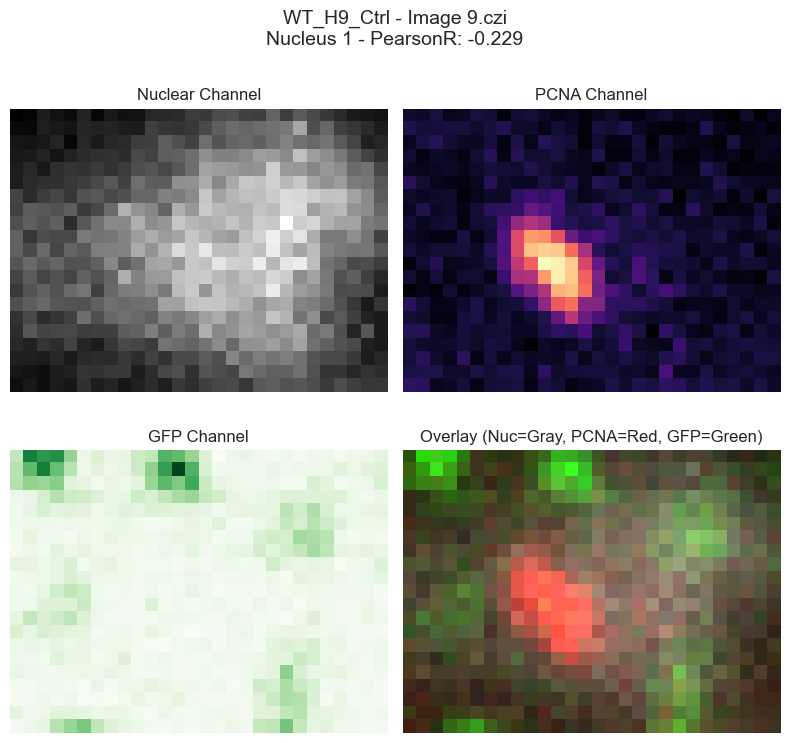

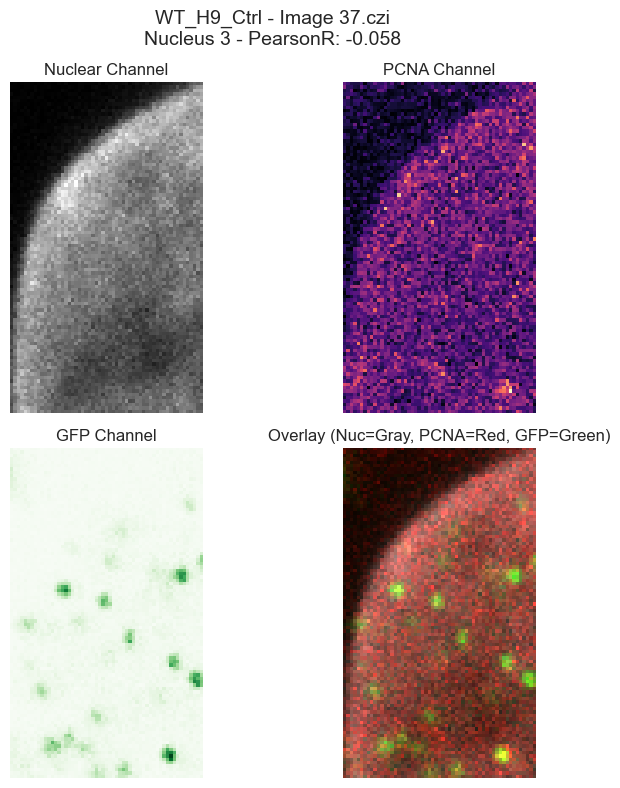

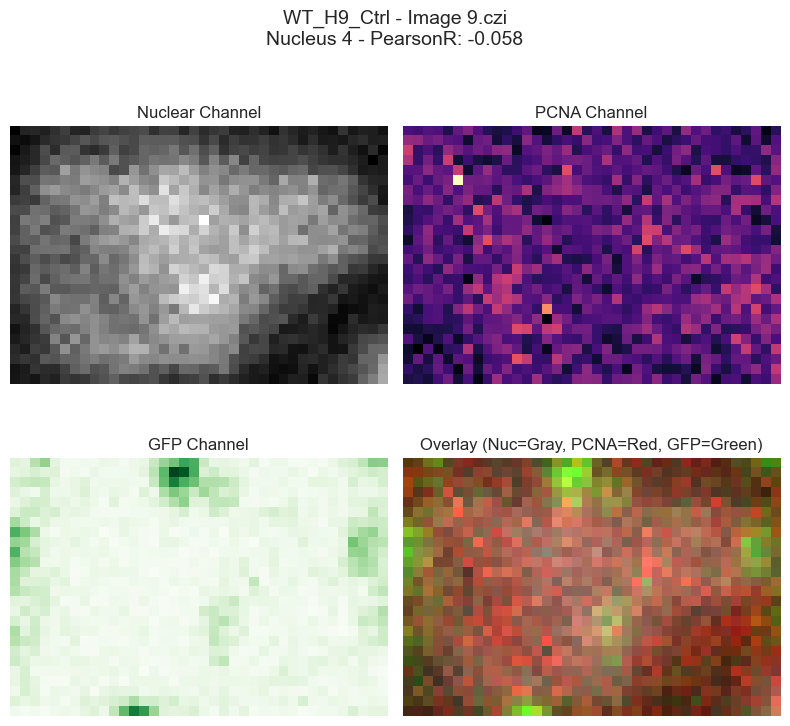

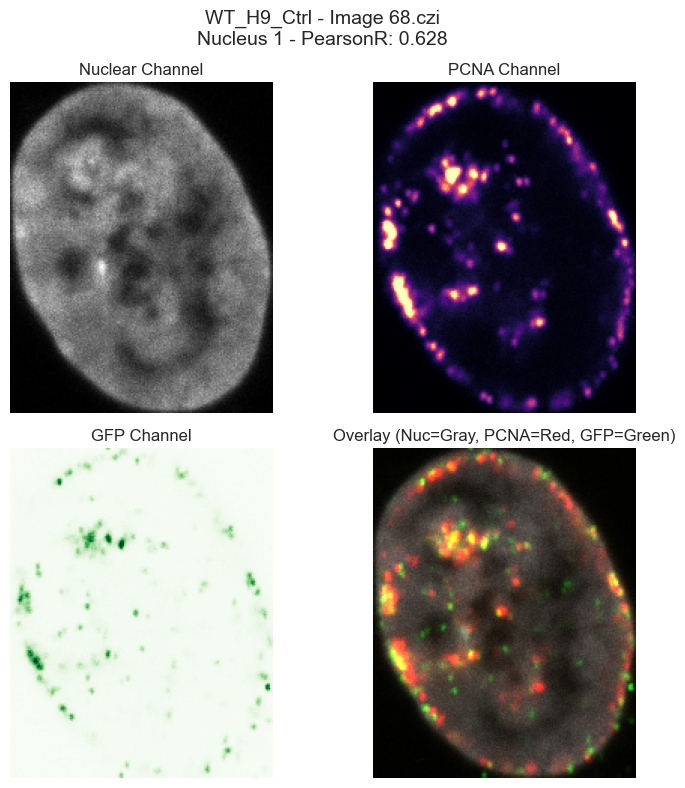

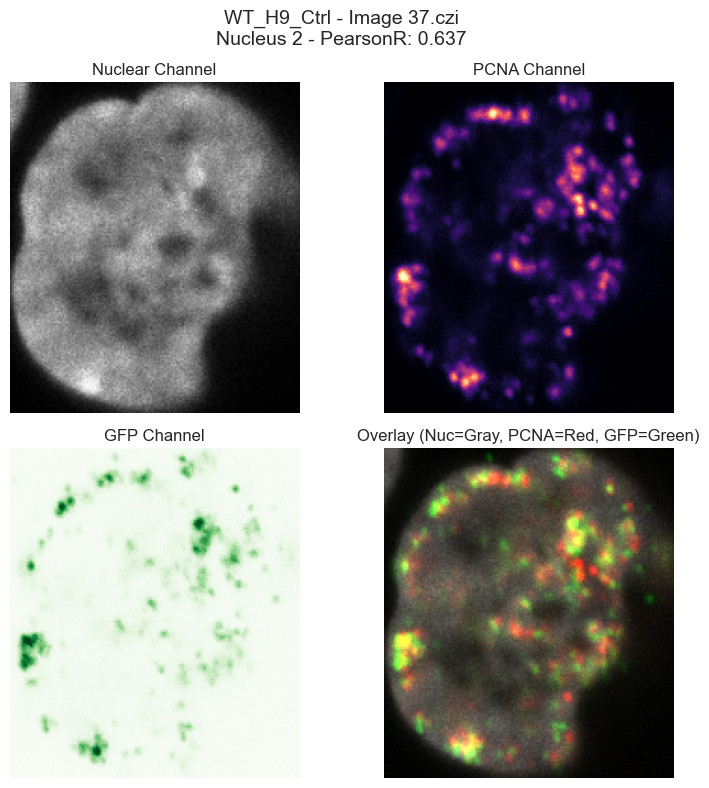

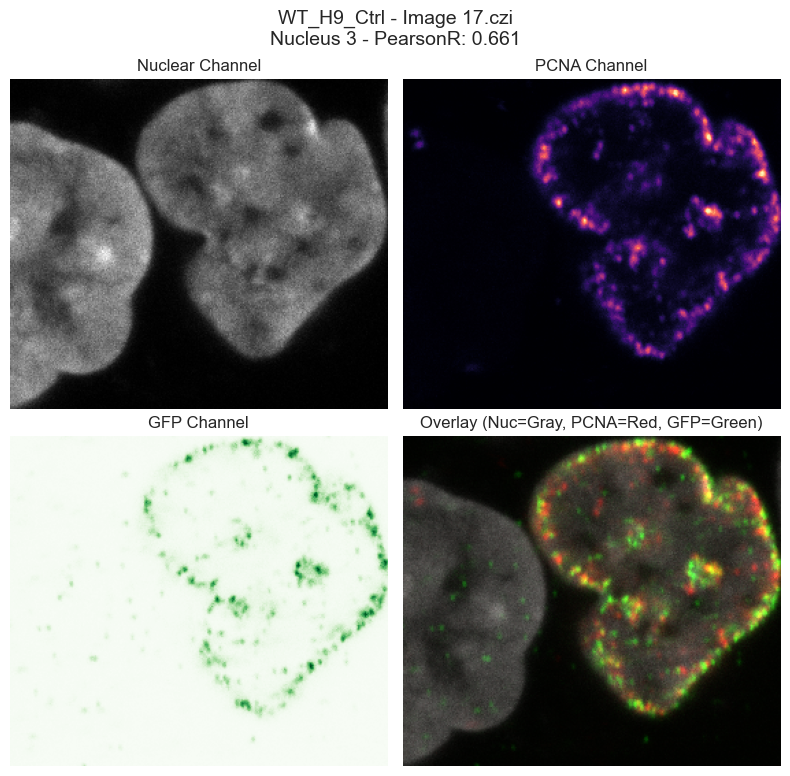

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from aicsimageio import AICSImage

# Parameters
data_dir = 'wt_czi_images'
sample_of_interest = "WT_H9_Ctrl"          # change sample
num_examples = 3                         # number of high and low correlation examples

########################
##      Samples       ##
##    "WT_H9_Ctrl"    ##
##    "WT_H9_MK"      ##
##    "WT_H9_MLN"     ##
##    "WT_H9_MLN_MK"  ##
##    "WT_H9_NU"      ##
########################

# Filter for the sample of interest
df_sample = combined_df[combined_df['Sample'] == sample_of_interest].copy()

if df_sample.empty:
    print(f"No data found for sample {sample_of_interest}.")
else:
    # Sort by PearsonR
    df_sample_sorted = df_sample.sort_values(by='PearsonR', ascending=True)  # ascending order
    
    # Low correlation: first num_examples nuclei
    low_corr_nuclei = df_sample_sorted.head(num_examples)
    # High correlation: last num_examples nuclei
    high_corr_nuclei = df_sample_sorted.tail(num_examples)
    
    # Combine them into one list for plotting
    representative_nuclei = pd.concat([low_corr_nuclei, high_corr_nuclei], ignore_index=True)

    # Channel indices as before
    nuclear_channel = 0
    pcna_channel = 1
    gfp_channel = 2

    # Function to load image and extract nucleus mask
    from skimage.measure import label, regionprops
    from skimage.filters import gaussian, threshold_otsu
    from skimage import morphology

    def load_image_and_get_nuc_mask(image_path):
        img = AICSImage(image_path)
        data = img.get_image_data("CYX", S=0, T=0, Z=0)
        stack = np.moveaxis(data, 0, -1)  # (Y, X, C)
        
        nuc_image = stack[:, :, nuclear_channel].astype(float)
        # Segment nuclei similarly to the original code
        nuc_blurred = gaussian(nuc_image, sigma=1.0)
        nuc_thresh_val = threshold_otsu(nuc_blurred)
        nuc_binary = nuc_blurred > nuc_thresh_val

        nuc_mask = morphology.remove_small_objects(nuc_binary, min_size=200)
        nuc_mask = morphology.remove_small_holes(nuc_mask, area_threshold=200)

        labeled_nuclei = label(nuc_mask)
        regions = regionprops(labeled_nuclei)
        
        return stack, labeled_nuclei, regions

    # Plotting each nucleus
    # We'll create a separate figure for each nucleus chosen
    for idx, row in representative_nuclei.iterrows():
        image_name = row['Image']
        nucleus_id = row['Nucleus_ID']
        pearson_val = row['PearsonR']

        # Construct path to image
        image_path = os.path.join(data_dir, row['Sample'], image_name)
        if not os.path.exists(image_path):
            print(f"Image not found: {image_path}")
            continue

        # Load image and segmentation
        stack, labeled_nuclei, regions = load_image_and_get_nuc_mask(image_path)

        # Find the region for the chosen nucleus
        # nucleus_id matches region.label
        region = None
        for r in regions:
            if r.label == nucleus_id:
                region = r
                break

        if region is None:
            print(f"Nucleus {nucleus_id} not found in {image_name}.")
            continue

        minr, minc, maxr, maxc = region.bbox
        nucleus_mask = (labeled_nuclei[minr:maxr, minc:maxc] == nucleus_id)

        # Extract channels for this nucleus
        nuc_crop = stack[minr:maxr, minc:maxc, nuclear_channel]
        pcna_crop = stack[minr:maxr, minc:maxc, pcna_channel]
        gfp_crop = stack[minr:maxr, minc:maxc, gfp_channel]

        # Create figure: 2 rows x 2 columns
        fig, axes = plt.subplots(2, 2, figsize=(8,8))
        fig.suptitle(f"{row['Sample']} - {image_name}\nNucleus {nucleus_id} - PearsonR: {pearson_val:.3f}", fontsize=14)

        # Nuclear channel
        axes[0,0].imshow(nuc_crop, cmap='gray')
        axes[0,0].set_title("Nuclear Channel")
        axes[0,0].axis('off')

        # PCNA channel
        axes[0,1].imshow(pcna_crop, cmap='magma')
        axes[0,1].set_title("PCNA Channel")
        axes[0,1].axis('off')

        # GFP channel
        axes[1,0].imshow(gfp_crop, cmap='Greens')
        axes[1,0].set_title("GFP Channel")
        axes[1,0].axis('off')

        # Overlay: Nuc in gray, PCNA in red, GFP in green
        # Normalize channels for visualization
        pcna_norm = pcna_crop / pcna_crop.max() if pcna_crop.max() != 0 else pcna_crop
        gfp_norm = gfp_crop / gfp_crop.max() if gfp_crop.max() != 0 else gfp_crop
        nuc_norm = nuc_crop / nuc_crop.max() if nuc_crop.max() != 0 else nuc_crop

        # Create RGB overlay
        # nuclear in gray means we put it equally in R,G,B but dimmer so we can see PCNA and GFP
        overlay = np.stack([
            np.clip(nuc_norm*0.5 + pcna_norm, 0, 1),
            np.clip(nuc_norm*0.5 + gfp_norm, 0, 1),
            np.clip(nuc_norm*0.5, 0, 1)
        ], axis=-1)

        axes[1,1].imshow(overlay)
        axes[1,1].set_title("Overlay (Nuc=Gray, PCNA=Red, GFP=Green)")
        axes[1,1].axis('off')

        plt.tight_layout()
        plt.show()


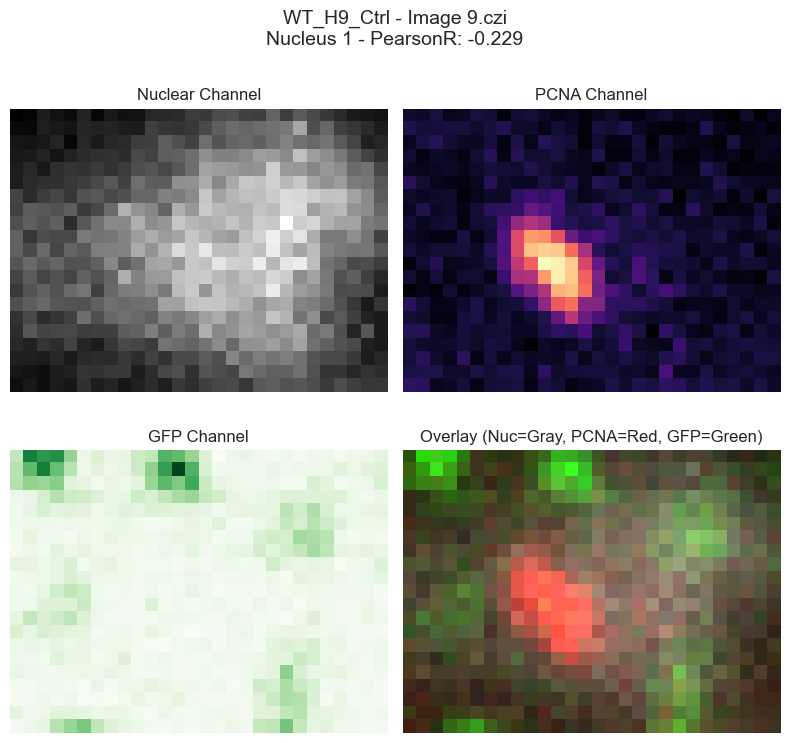

Saved TIFF with multiple pages to wt_czi_images/WT_H9_Ctrl/WT_H9_Ctrl_Image 9_Nuc1_Pearson-0.229.tif


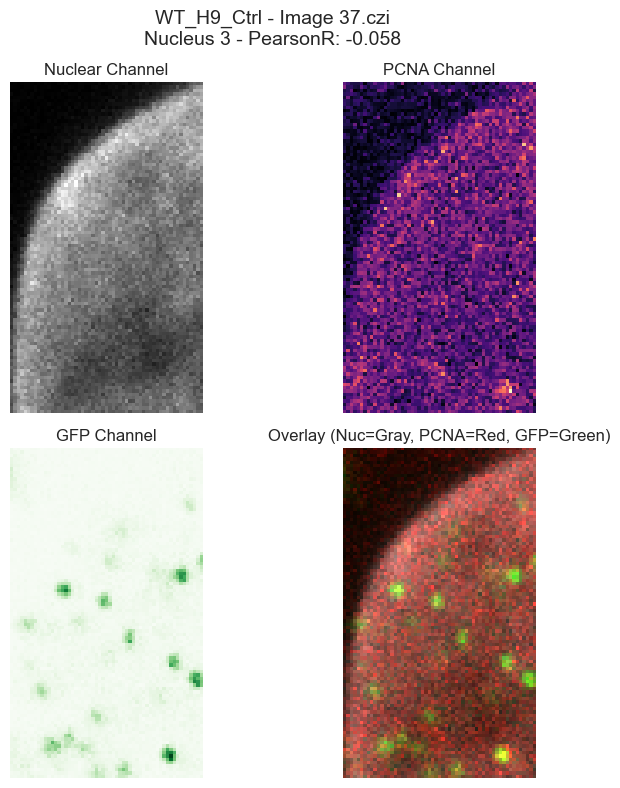

Saved TIFF with multiple pages to wt_czi_images/WT_H9_Ctrl/WT_H9_Ctrl_Image 37_Nuc3_Pearson-0.058.tif


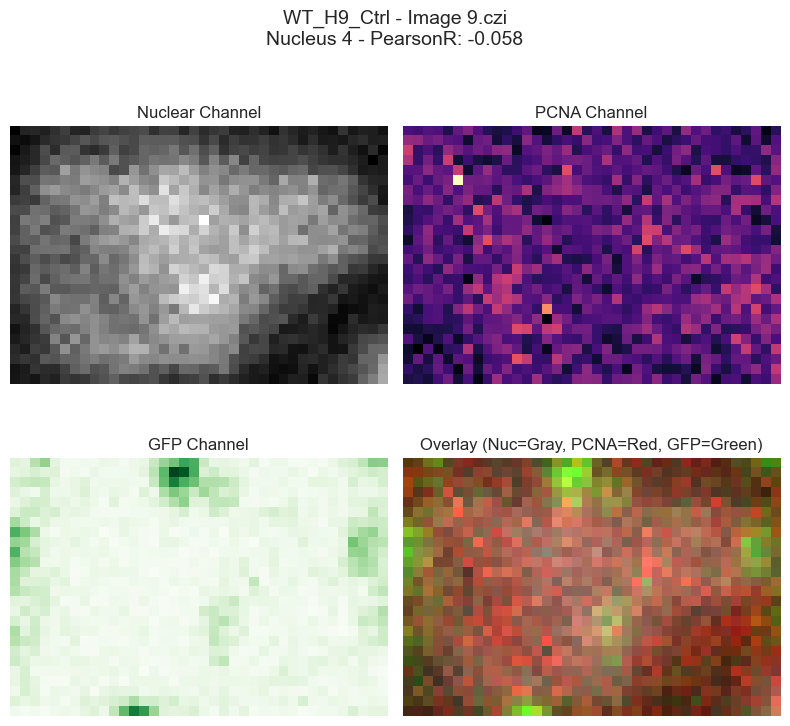

Saved TIFF with multiple pages to wt_czi_images/WT_H9_Ctrl/WT_H9_Ctrl_Image 9_Nuc4_Pearson-0.058.tif


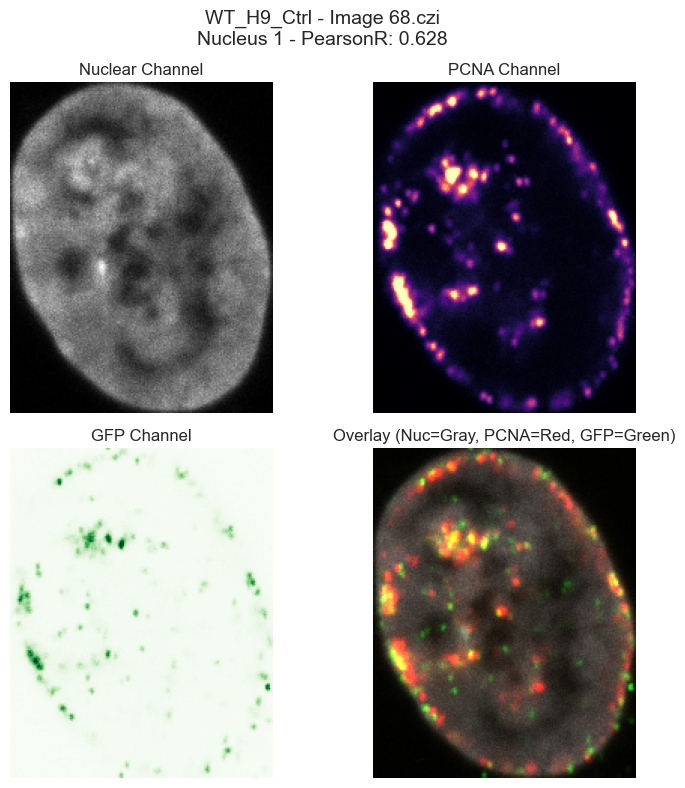

Saved TIFF with multiple pages to wt_czi_images/WT_H9_Ctrl/WT_H9_Ctrl_Image 68_Nuc1_Pearson0.628.tif


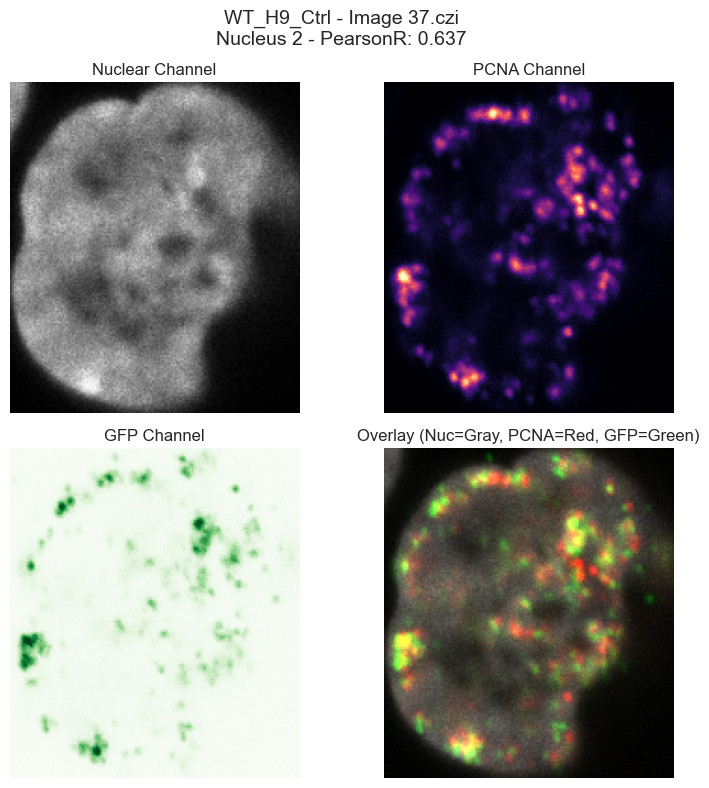

Saved TIFF with multiple pages to wt_czi_images/WT_H9_Ctrl/WT_H9_Ctrl_Image 37_Nuc2_Pearson0.637.tif


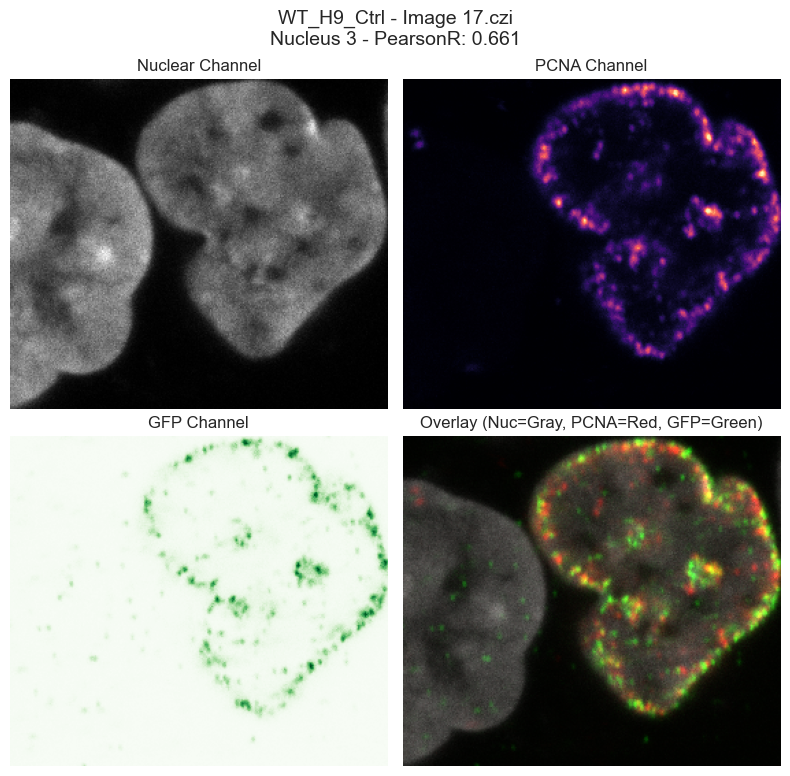

Saved TIFF with multiple pages to wt_czi_images/WT_H9_Ctrl/WT_H9_Ctrl_Image 17_Nuc3_Pearson0.661.tif


In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from aicsimageio import AICSImage
from skimage.measure import label, regionprops
from skimage.filters import gaussian, threshold_otsu
from skimage import morphology
import tifffile

# Parameters
data_dir = 'wt_czi_images'
sample_of_interest = "WT_H9_Ctrl"  # change to any sample you want
num_examples = 3                   # number of high and low correlation examples

nuclear_channel = 0
pcna_channel = 1
gfp_channel = 2

# Filter for the sample of interest
df_sample = combined_df[combined_df['Sample'] == sample_of_interest].copy()

if df_sample.empty:
    print(f"No data found for sample {sample_of_interest}.")
else:
    # Sort by PearsonR
    df_sample_sorted = df_sample.sort_values(by='PearsonR', ascending=True)  # ascending order
    
    # Low correlation: first num_examples nuclei
    low_corr_nuclei = df_sample_sorted.head(num_examples)
    # High correlation: last num_examples nuclei
    high_corr_nuclei = df_sample_sorted.tail(num_examples)
    
    # Combine them into one list for plotting
    representative_nuclei = pd.concat([low_corr_nuclei, high_corr_nuclei], ignore_index=True)

    def load_image_and_get_nuc_mask(image_path):
        img = AICSImage(image_path)
        data = img.get_image_data("CYX", S=0, T=0, Z=0)
        stack = np.moveaxis(data, 0, -1)  # (Y, X, C)
        
        nuc_image = stack[:, :, nuclear_channel].astype(float)
        # Segment nuclei similarly to the original code
        nuc_blurred = gaussian(nuc_image, sigma=1.0)
        nuc_thresh_val = threshold_otsu(nuc_blurred)
        nuc_binary = nuc_blurred > nuc_thresh_val

        nuc_mask = morphology.remove_small_objects(nuc_binary, min_size=200)
        nuc_mask = morphology.remove_small_holes(nuc_mask, area_threshold=200)

        labeled_nuclei = label(nuc_mask)
        regions = regionprops(labeled_nuclei)
        
        return stack, labeled_nuclei, regions

    for idx, row in representative_nuclei.iterrows():
        image_name = row['Image']
        nucleus_id = row['Nucleus_ID']
        pearson_val = row['PearsonR']

        # Construct path to image
        image_path = os.path.join(data_dir, row['Sample'], image_name)
        if not os.path.exists(image_path):
            print(f"Image not found: {image_path}")
            continue

        # Load image and segmentation
        stack, labeled_nuclei, regions = load_image_and_get_nuc_mask(image_path)

        # Find the region for the chosen nucleus
        region = None
        for r in regions:
            if r.label == nucleus_id:
                region = r
                break

        if region is None:
            print(f"Nucleus {nucleus_id} not found in {image_name}.")
            continue

        minr, minc, maxr, maxc = region.bbox
        nuc_crop = stack[minr:maxr, minc:maxc, nuclear_channel]
        pcna_crop = stack[minr:maxr, minc:maxc, pcna_channel]
        gfp_crop = stack[minr:maxr, minc:maxc, gfp_channel]

        # Create overlay: Nuc in gray, PCNA in red, GFP in green
        pcna_norm = pcna_crop / pcna_crop.max() if pcna_crop.max() != 0 else pcna_crop
        gfp_norm = gfp_crop / gfp_crop.max() if gfp_crop.max() != 0 else gfp_crop
        nuc_norm = nuc_crop / nuc_crop.max() if nuc_crop.max() != 0 else nuc_crop

        overlay = np.stack([
            np.clip(nuc_norm*0.5 + pcna_norm, 0, 1),
            np.clip(nuc_norm*0.5 + gfp_norm, 0, 1),
            np.clip(nuc_norm*0.5, 0, 1)
        ], axis=-1)

        # Plotting
        fig, axes = plt.subplots(2, 2, figsize=(8,8))
        fig.suptitle(f"{row['Sample']} - {image_name}\nNucleus {nucleus_id} - PearsonR: {pearson_val:.3f}", fontsize=14)

        axes[0,0].imshow(nuc_crop, cmap='gray')
        axes[0,0].set_title("Nuclear Channel")
        axes[0,0].axis('off')

        axes[0,1].imshow(pcna_crop, cmap='magma')
        axes[0,1].set_title("PCNA Channel")
        axes[0,1].axis('off')

        axes[1,0].imshow(gfp_crop, cmap='Greens')
        axes[1,0].set_title("GFP Channel")
        axes[1,0].axis('off')

        axes[1,1].imshow(overlay)
        axes[1,1].set_title("Overlay (Nuc=Gray, PCNA=Red, GFP=Green)")
        axes[1,1].axis('off')

        plt.tight_layout()
        plt.show()

        # Now, save these as a multipage TIFF
        # Convert to uint8 for saving
        def to_uint8(arr):
            arr = arr.copy()
            arr_min, arr_max = arr.min(), arr.max()
            if arr_max > arr_min:
                arr = (arr - arr_min) / (arr_max - arr_min)
            arr = (arr * 255).astype(np.uint8)
            return arr

        nuc_uint8 = to_uint8(nuc_crop)
        pcna_uint8 = to_uint8(pcna_crop)
        gfp_uint8 = to_uint8(gfp_crop)
        overlay_uint8 = (overlay * 255).astype(np.uint8)  # overlay already normalized 0-1

        # Construct output filename
        nucleus_id_str = str(nucleus_id)
        base_name = os.path.splitext(image_name)[0]
        out_tif_name = f"{row['Sample']}_{base_name}_Nuc{nucleus_id_str}_Pearson{pearson_val:.3f}.tif"
        out_path = os.path.join(data_dir, row['Sample'], out_tif_name)

        # Save multipage TIFF: first grayscale channels, then overlay
        # We'll write them as separate pages in one TIFF file
        # First three pages: grayscale (photometric='minisblack')
        tifffile.imwrite(out_path, nuc_uint8, photometric='minisblack')
        tifffile.imwrite(out_path, pcna_uint8, photometric='minisblack', append=True)
        tifffile.imwrite(out_path, gfp_uint8, photometric='minisblack', append=True)
        # RGB overlay page (photometric='rgb')
        # overlay shape is (height, width, 3)
        tifffile.imwrite(out_path, overlay_uint8, photometric='rgb', append=True)

        print(f"Saved TIFF with multiple pages to {out_path}")
